# Modeling exercise

In [27]:
import pandas as pd
import numpy as np
import plotly_express as px
import ipywidgets as widgets

In [2]:
slope, intercept = 2.5, 6

In [24]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [25]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

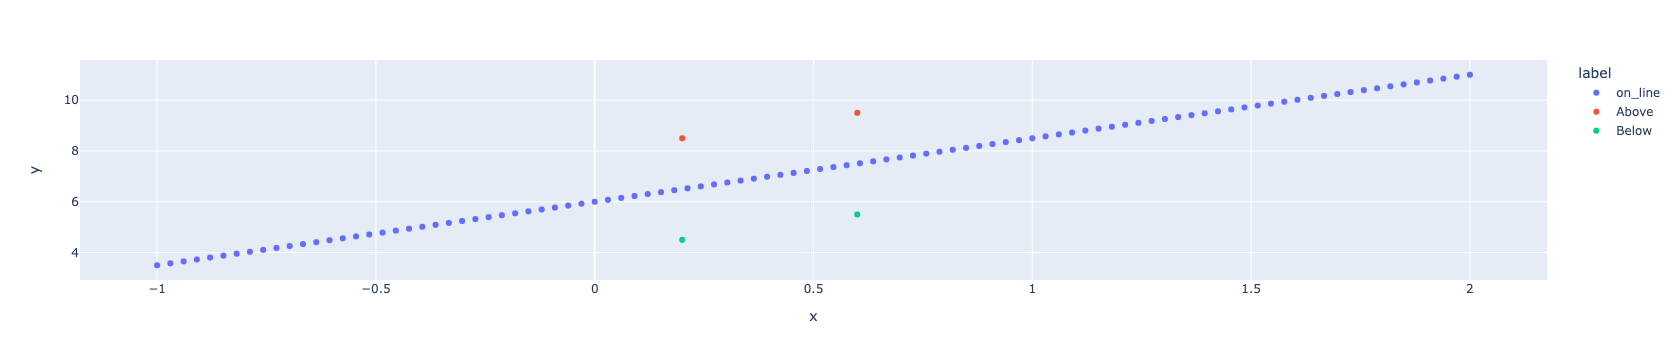

In [26]:
px.scatter(data, x='x', y='y', color = 'label')

## Fitting and Overfiting 

The goal of the following exercise is to observe overfitting causes:
* Overfitting due to insuffient data
* Overfitting due to overly complex model


For each below dataset:
* Create data of size N with noise level of magnitude NL. 
* Split it to training and testing data
* Choose a complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
* Train on the train test for different hyper parameter values. compute:
  * Classification accuracy on the training set (TRE)
  * Classification accuracy on the testing set (TESTE)
  * The difference beteen the two above (E_DIFF)
* Save N, NL, TRE, TESTE, E_DIFF and the regularization param (K, gamma or min_samples_split)

Repeat for N in range 50 to 10000 and NL in range 0 to 0.5. Create a proper dataframe from the results and analyze:
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? 
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? 
1. Select the best model param to fit the data (The one minimizing the test error) and for it, observe the number of data points needed for optimal test results in different noise levels.

## Moons dataset

In [6]:
from sklearn.datasets import make_moons

In [15]:
points, label = make_moons(n_samples=1000, noise=0.25)
moons_df = pd.DataFrame(points, columns=['x','y'])
moons_df['label'] = label
moons_df.label = moons_df.label.map({0:'A', 1:'B'})
moons_df.head()

,x,y,label
0,1.754285,-0.260105,B
1,0.015481,1.006597,A
2,0.304888,1.017170,A
3,-0.081522,1.201588,A
4,0.833199,-0.431802,B


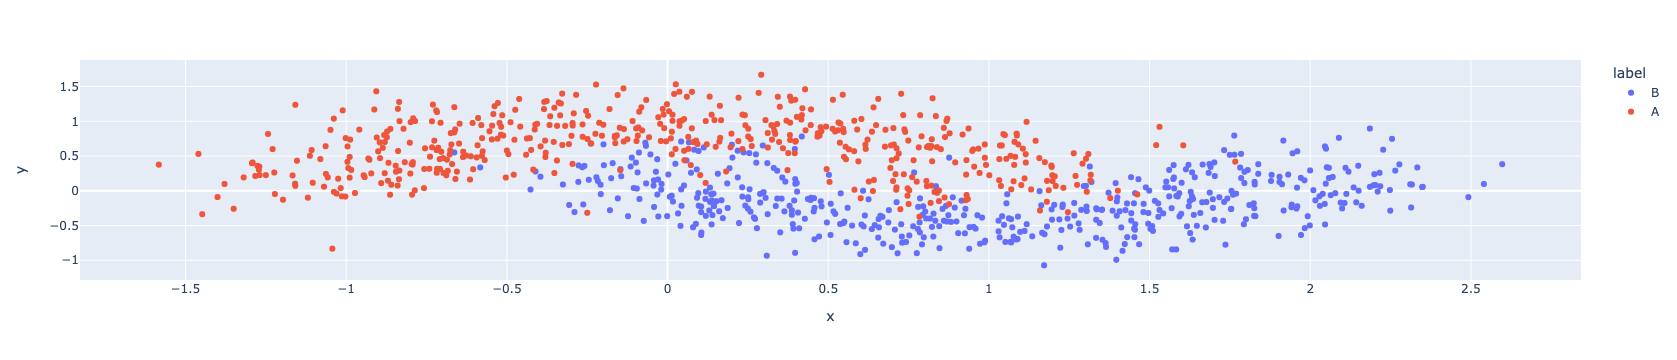

In [59]:
px.scatter(moons_df, x='x', y='y', color = 'label')

In [56]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    points, label = make_moons(n_samples=1000, noise=noise_level)
    moons_df = pd.DataFrame(points, columns=['x','y'])
    moons_df['label'] = label
    moons_df.label = moons_df.label.map({0:'A', 1:'B'})
    return px.scatter(moons_df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…

## Circles Dataset

In [44]:
from sklearn.datasets import make_circles

In [49]:
def make_circles_dataframe(n_samples, noise_level):
    points, label = make_circles(n_samples=n_samples, noise=noise_level)
    circles_df = pd.DataFrame(points, columns=['x','y'])
    circles_df['label'] = label
    circles_df.label = circles_df.label.map({0:'A', 1:'B'})
    return circles_df

In [52]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

,x,y,label
0,0.569229,0.562120,B
1,-0.260842,0.965382,A
2,0.236499,-0.971632,A
3,0.012566,0.999921,A
4,0.719524,0.349693,B


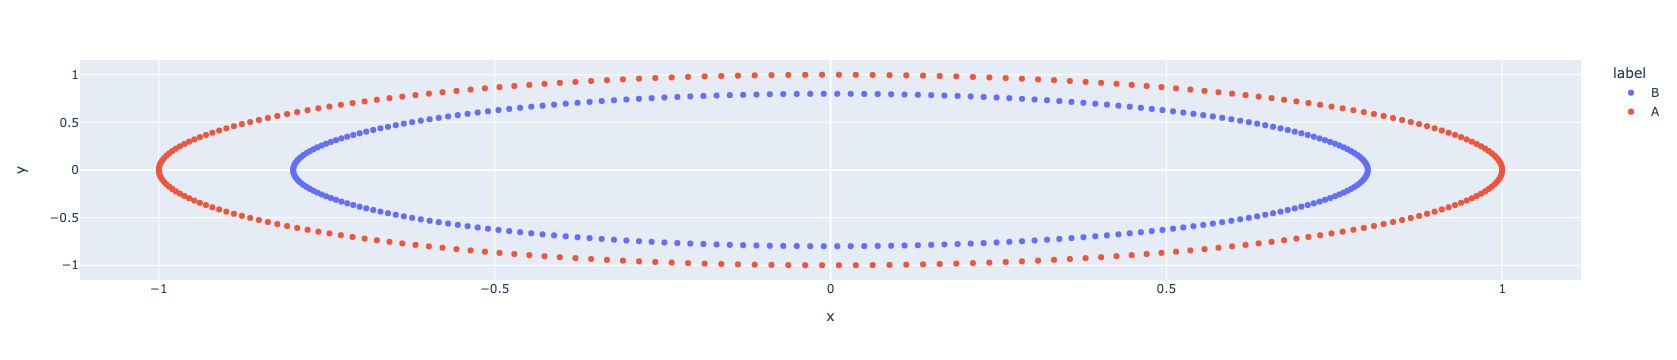

In [53]:
px.scatter(circles_df, x='x', y='y', color = 'label')

In [58]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

interactive(children=(FloatSlider(value=0.0, description='noise_level', max=0.5, step=0.05), Output()), _dom_c…